# Multi energy districts - Examples

***&copy; 2021 Martínez Ceseña<sup>1</sup> and Mancarella<sup>2</sup> — <sup>1,2</sup>University of Manchester, UK, and <sup>2</sup>University of Melbourne, Australia***

This is one of the documents in a series of jupyter notebooks which presents a general formulation to optimise the operation of multi-energy districts (MED). These systems bring together one or more Multi-energy system (MES) which can exchange flows through different networks (e.g., electricity, heat and gas). 

This particular notebook provises examples of MED connected to the power system under steady-state conditions. The xamples demonstrate that, due to their flexibility, MED can provide services such as voltage support. 

For more details about the models presented here, and more complex tools which consider multiple MED and integrated electricity-heat-gas networks, refer to the following literature:

1. E. A. Martínez Ceseña, E. Loukarakis, N. Good and P. Mancarella, "[Integrated Electricity-Heat-Gas Systems: Techno-Economic Modeling, Optimization, and Application to Multienergy Districts](https://ieeexplore.ieee.org/document/9108286)," in Proceedings of the IEEE, Vol. 108, pp. 1392 –1410, 2020.

1. E. A. Martínez Ceseña and P. Mancarella, “[Energy systems integration in Smart districts: Robust optimisation of multi-energy flows in integrated electricity, heat and gas networks](https://ieeexplore.ieee.org/document/8340876),” IEEE Transactions on Smart Grid, vol. 10, no. 1, pp. 1122 –1131, 2019.

1. E. A. Martínez Ceseña, T. Capuder and P. Mancarella, “[Flexible distributed multi-energy generation system expansion planning under uncertainty](https://ieeexplore.ieee.org/document/7064771),” IEEE Transactions on Smart Grid, Vol. 7, pp. 348 –357, 2016.

1. T. Capuder, P. Mancarella, "[Techno-economic and environmental modelling and optimization of flexible distributed multi-generation options](https://www.sciencedirect.com/science/article/pii/S0360544214005283)," Energy, Vol. 71, pp. 516-533, 2014.

1. G. Chicco, S. Riaz, A. Mazza and P. Mancarella, "[Flexibility From Distributed Multienergy Systems](https://ieeexplore.ieee.org/document/9082595)," in Proceedings of the IEEE, Vol. 108, pp. 1496-1517, 2020.

1. E. Corsetti, S. Riaz, M. Riello, P. Mancarella, “[Modelling and deploying multi-energy flexibility: The energy lattice framework](https://www.sciencedirect.com/science/article/pii/S2666792421000238)”, Advances in Applied Energy, Vol. 2, 2021.

## List of contents

- [Default case study](#Default-case-study)
- [Interactive model](#Interactive-model)
- [Bigger MED](#Bigger-MED)
- [Different configuration](#Different-configuration)

[Back to top](#Multi-energy-districts---Examples)

## Before we begin

Before we begin, be aware that, to benefit the most from this notebook, you will need a basic understanding of: 
- [Newton's method](https://www.sciencedirect.com/topics/mathematics/newtons-method), which is the method used in this notebook.
- [Linear programming](https://realpython.com/linear-programming-python/) (LP) models, which are the types of models presented below.
- [Python](https://www.python.org/), which is the language used in this notebook.
- The [pyomo](https://pyomo.readthedocs.io/en/stable/index.html) library, which is the optimisation software used to solve the examples in this notebook.

This notebook requires the following python libraries to work:

In [1]:
!pip install nbimporter

In [2]:
import pyomo.environ as pyo
import nbimporter
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

In addition, the tools developed in the following notebook are required:
- [Multi energy districts - Model](./Multi%20energy%20districts%20-%20Model.ipynb)
- [Integrated networks modelling - Electricity](./Integrated%20networks%20modelling%20-%20Electricity.ipynb)
- [Multi-energy generation systems - Example with cogeneration](./Multi-energy%20generation%20systems%20-%20Example%20with%20cogeneration.ipynb)

In [3]:
mes_CoG = __import__('Multi-energy generation systems - Example with cogeneration')
build_MES_Cogeneration_Model = mes_CoG.build_MES_Cogeneration_Model
build_MES_CG = mes_CoG.build_MES_CG
sankey_MES_Cogeneration = mes_CoG.sankey_MES_Cogeneration
flexibility_MES_Cogeneration = mes_CoG.flexibility_MES_Cogeneration

Power_Network = __import__('Integrated networks modelling - Electricity')
Elec_Model = Power_Network.Elec_Model

MED_Methods = __import__('Multi energy districts - Model')
MED_Model = MED_Methods.MED_Model


[Back to top](#Multi-energy-districts---Examples)

## Default case study

Building on the concepts and models developed above, the example presented above (also shown in the figure below) can be created and solved as follows:

![Power_Network_3Bus_MED.png](Figures/Power_Network_3Bus_MED.png)

VOLTAGES  [pu] [deg]:
 1)   0.9671 +j  -0.0365 (  0.9678 ∠  -2.1592)
 2)   0.9379 +j  -0.0631 (  0.9400 ∠  -3.8513)
 3)   1.0000 +j   0.0000 (  1.0000 ∠   0.0000)
CURRENTS [pu] [deg]:
 1- 2)   0.0109 +j  -0.0061 (  0.0125 ∠ -29.1748)
 1- 3)  -0.0142 +j   0.0062 (  0.0155 ∠ 156.3752)
 2- 3)  -0.0252 +j   0.0123 (  0.0280 ∠ 153.8991)
POWER  [MVA]:
      From:                To:                   Loss:
 1- 2)   1.0788 +j   0.5500  -1.0631 +j  -0.5031 (  0.0157 +j   0.0470)
 1- 3)  -1.3988 +j  -0.5500   1.4229 +j   0.6224 (  0.0241 +j   0.0724)
 2- 3)  -2.4369 +j  -0.9969   2.5154 +j   1.2323 (  0.0785 +j   0.2354)


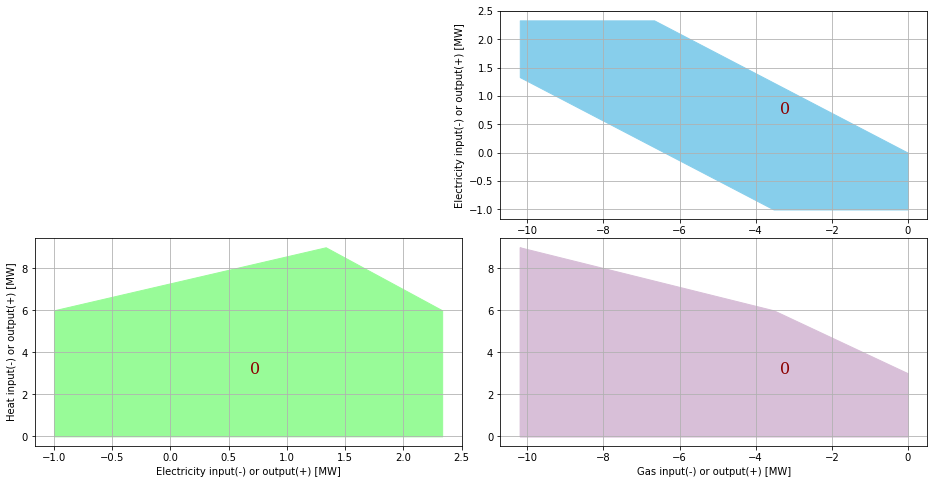

In [4]:
# MED DATA
lp_model = pyo.ConcreteModel()
lp_model.Set_Periods = range(1)
lp_model.dt = 1

# Demands
lp_model.Electricity_Demand = [1]  # [MW]
lp_model.Heat_Demand = [3]  # [MW]

# DER
lp_model.Boiler_Heat_Capacity = 3  # [MW]
lp_model.Boiler_Heat_Efficiency = 0.85  # [pu]

lp_model.EHP_Heat_Capacity = 3  # [MW]
lp_model.EHP_Heat_Efficiency = 3  # [pu]

lp_model.CHP_Heat_Capacity = 3  # [MW]
lp_model.CHP_Electricity_Efficiency = 0.35  # [pu]
lp_model.CHP_Heat_Efficiency = 0.45  # [pu]

# Prices and penalties
lp_model.Electricity_Import_Price = [0.1]  # [£/MWh]
lp_model.Electricity_Export_Price = [0.01]  # [£/MWh]
lp_model.Gas_Import_Price = [0.1]  # [£/MWh]

lp_model.Heat_Spill_Penalty = [0]  # [£/MWh]
lp_model.Heat_Shedding_Penalty = [1000]  # [£/MWh]

# POWER NETWORK DATA
Elec_Net = {}
Elec_Net['Connectivity'] = np.array([[1, 2], [1, 3], [2, 3]])
Elec_Net['R'] = [1, 1, 1]  # [pu]
Elec_Net['X'] = [3, 3, 3]  # [pu]

Elec_Net['Demand_Active'] = [0, 3.5, 3.5]  # [MW]
Elec_Net['Demand_Reactive'] = [0, 1.5, 1.5]  # [MVAr]
Elec_Net['Generation_Active'] = [0, 0, 0]  # [MW]
Elec_Net['Generation_Reactive'] = [0, 0, 0]  # [MVAr]

Elec_Net['Slack_Bus'] = 3 

# CONNECTIONS BETWEEN MED AND POWER NETWORK
Dis = {}
Dis['Elec'] = {}
Dis['Elec']['Location'] = [1] # Connection to power system,
Dis['Elec']['PF'] = [1]

# SOLVING THE MODEL
MES_Model = build_MES_Cogeneration_Model
(mod, model)=MED_Model(lp_model, Elec_Net, Dis, MES_Model, Elec_Model, build_MES_CG)
mod.display()
sankey_MES_Cogeneration(model)

flexibility_MES_Cogeneration(model, True, True, True,
                             'Electricity input(-) or output(+) [MW]',
                             'Heat input(-) or output(+) [MW]',
                             'Gas input(-) or output(+) [MW]')

[Back to top](#Multi-energy-districts---Examples)

## Interactive model

Let us explore the operation of the MED above, but now subject to different system conditions.
![Power_Network_3Bus_MED.png](Figures/Power_Network_3Bus_MED.png)

In [5]:
@interact
def Pow_Sys(P2 = widgets.FloatSlider(min=0,max=5,step=0.01,value=3.5,continuous_update=False), 
            Q2 = widgets.FloatSlider(min=0,max=2.5,step=0.01,value=1.5,continuous_update=False),
            Sankey = widgets.FloatSlider(min=0,max=1,step=1,value=0),
            Flex = widgets.FloatSlider(min=0,max=1,step=1,value=0)):
    # MED DATA
    lp_model = pyo.ConcreteModel()
    lp_model.Set_Periods = range(1)
    lp_model.dt = 1

    # Demands
    lp_model.Electricity_Demand = [1]  # [MW]
    lp_model.Heat_Demand = [3]  # [MW]

    # DER
    lp_model.Boiler_Heat_Capacity = 3  # [MW]
    lp_model.Boiler_Heat_Efficiency = 0.85  # [pu]

    lp_model.EHP_Heat_Capacity = 3  # [MW]
    lp_model.EHP_Heat_Efficiency = 3  # [pu]

    lp_model.CHP_Heat_Capacity = 3  # [MW]
    lp_model.CHP_Electricity_Efficiency = 0.35  # [pu]
    lp_model.CHP_Heat_Efficiency = 0.45  # [pu]

    # Prices and penalties
    lp_model.Electricity_Import_Price = [0.1]  # [£/MWh]
    lp_model.Electricity_Export_Price = [0.01]  # [£/MWh]
    lp_model.Gas_Import_Price = [0.1]  # [£/MWh]

    lp_model.Heat_Spill_Penalty = [0]  # [£/MWh]
    lp_model.Heat_Shedding_Penalty = [1000]  # [£/MWh]

    # POWER NETWORK DATA
    Elec_Net = {}
    Elec_Net['Connectivity'] = np.array([[1, 2], [1, 3], [2, 3]])
    Elec_Net['R'] = [1, 1, 1]  # [pu]
    Elec_Net['X'] = [3, 3, 3]  # [pu]

    Elec_Net['Demand_Active'] = [0, P2, 3.5]  # [MW]
    Elec_Net['Demand_Reactive'] = [0, Q2, 1.5]  # [MVAr]
    Elec_Net['Generation_Active'] = [0, 0, 0]  # [MW]
    Elec_Net['Generation_Reactive'] = [0, 0, 0]  # [MVAr]

    Elec_Net['Slack_Bus'] = 3 

    # CONNECTIONS BETWEEN MED AND POWER NETWORK
    Dis = {}
    Dis['Elec'] = {}
    Dis['Elec']['Location'] = [1] # Connection to power system,
    Dis['Elec']['PF'] = [1]

    # SOLVING THE MODEL
    (mod, model)=MED_Model(lp_model, Elec_Net, Dis, MES_Model, Elec_Model, build_MES_CG)
    mod.display()
    if Sankey == 1:
        sankey_MES_Cogeneration(model)
    
    if Flex == 1:
        flexibility_MES_Cogeneration(model, True, True, True,
                                     'Electricity input(-) or output(+) [MW]',
                                     'Heat input(-) or output(+) [MW]',
                                     'Gas input(-) or output(+) [MW]')

interactive(children=(FloatSlider(value=3.5, continuous_update=False, description='P2', max=5.0, step=0.01), F…

[Back to top](#Multi-energy-districts---Examples)

## Bigger MED

Let us keep the current MED configuration, but increasing demand significantly.

Let us explore the operation of the MED above, but now subject to different system conditions.
![Power_Network_3Bus_MED.png](Figures/Power_Network_3Bus_MED.png)

In [6]:
@interact
def Pow_Sys(P2 = widgets.FloatSlider(min=0,max=50,step=0.5,value=35,continuous_update=False), 
            Q2 = widgets.FloatSlider(min=0,max=25,step=0.5,value=7,continuous_update=False),
            Sankey = widgets.FloatSlider(min=0,max=1,step=1,value=0),
            Flex = widgets.FloatSlider(min=0,max=1,step=1,value=0)):

    # MED DATA
    lp_model = pyo.ConcreteModel()
    lp_model.Set_Periods = range(1)
    lp_model.dt = 1

    # Demands
    lp_model.Electricity_Demand = [10]  # [MW]
    lp_model.Heat_Demand = [30]  # [MW]

    # DER
    lp_model.Boiler_Heat_Capacity = 30  # [MW]
    lp_model.Boiler_Heat_Efficiency = 0.85  # [pu]

    lp_model.EHP_Heat_Capacity = 30  # [MW]
    lp_model.EHP_Heat_Efficiency = 3  # [pu]

    lp_model.CHP_Heat_Capacity = 30  # [MW]
    lp_model.CHP_Electricity_Efficiency = 0.35  # [pu]
    lp_model.CHP_Heat_Efficiency = 0.45  # [pu]
    
    # Prices and penalties
    lp_model.Electricity_Import_Price = [10]  # [£/MWh]
    lp_model.Electricity_Export_Price = [1]  # [£/MWh]
    lp_model.Gas_Import_Price = [10]  # [£/kWh]

    lp_model.Heat_Spill_Penalty = [0]  # [£/kWh]
    lp_model.Heat_Shedding_Penalty = [1000]  # [£/kWh]

    # POWER NETWORK DATA
    Elec_Net = {}
    Elec_Net['Connectivity'] = np.array([[1, 2], [1, 3], [2, 3]])
    Elec_Net['R'] = [0.02, 0.05, 0.08]  # [pu]
    Elec_Net['X'] = [0.2, 0.5, 0.8]  # [pu]

    Elec_Net['Demand_Active'] = [0, P2, 30]  # [MW]
    Elec_Net['Demand_Reactive'] = [0, Q2, 15]  # [MVAr]
    Elec_Net['Generation_Active'] = [0, 0, 0]  # [MW]
    Elec_Net['Generation_Reactive'] = [0, 0, 0]  # [MVAr]

    Elec_Net['Slack_Bus'] = 3 
    Elec_Net['Slack_Voltage'] = 1.0

    # CONNECTIONS BETWEEN MED AND POWER NETWORK
    Dis = {}
    Dis['Elec'] = {}
    Dis['Elec']['Location'] = [1] # Connection to power system,
    Dis['Elec']['PF'] = [1]

    # SOLVING THE MODEL
    (mod, model)=MED_Model(lp_model, Elec_Net, Dis, MES_Model, Elec_Model, build_MES_CG)
    mod.display()
    if Sankey == 1:
        sankey_MES_Cogeneration(model)
    if Flex == 1:
        flexibility_MES_Cogeneration(model, True, True, True,
                                     'Electricity input(-) or output(+) [MW]',
                                     'Heat input(-) or output(+) [MW]',
                                     'Gas input(-) or output(+) [MW]')

interactive(children=(FloatSlider(value=35.0, continuous_update=False, description='P2', max=50.0, step=0.5), …

[Back to top](#Multi-energy-districts---Examples)

## Different configuration

This time consider the network configuration presented below. The MED is now located in bus 5.

![Power_Network_5Bus_MED.png](Figures/Power_Network_5Bus_MED.png)

In [7]:
@interact
def Pow_Sys(P2 = widgets.FloatSlider(min=0,max=5,step=0.1,value=1,continuous_update=False), 
            Q2 = widgets.FloatSlider(min=0,max=2.5,step=0.1,value=0.1,continuous_update=False),
            P4 = widgets.FloatSlider(min=0,max=9,step=0.1,value=2,continuous_update=False), 
            Q4 = widgets.FloatSlider(min=0,max=5,step=0.1,value=0.5,continuous_update=False),
            Sankey = widgets.FloatSlider(min=0,max=1,step=1,value=0),
            Flex = widgets.FloatSlider(min=0,max=1,step=1,value=0)):
    # MED DATA
    lp_model = pyo.ConcreteModel()
    lp_model.Set_Periods = range(1)
    lp_model.dt = 1

    # Demands
    lp_model.Electricity_Demand = [1]  # [MW]
    lp_model.Heat_Demand = [3]  # [MW]

    # DER
    lp_model.Boiler_Heat_Capacity = 3  # [MW]
    lp_model.Boiler_Heat_Efficiency = 0.85  # [pu]

    lp_model.EHP_Heat_Capacity = 3  # [MW]
    lp_model.EHP_Heat_Efficiency = 3  # [pu]

    lp_model.CHP_Heat_Capacity = 3  # [MW]
    lp_model.CHP_Electricity_Efficiency = 0.35  # [pu]
    lp_model.CHP_Heat_Efficiency = 0.45  # [pu]

    # Prices and penalties
    lp_model.Electricity_Import_Price = [0.1]  # [£/MWh]
    lp_model.Electricity_Export_Price = [0.01]  # [£/MWh]
    lp_model.Gas_Import_Price = [0.1]  # [£/MWh]

    lp_model.Heat_Spill_Penalty = [0]  # [£/MWh]
    lp_model.Heat_Shedding_Penalty = [1000]  # [£/MWh]

    # POWER NETWORK DATA
    Elec_Net = {}
    Elec_Net['Connectivity'] = np.array([[1, 2], [2, 3], [3, 4], [3, 5]])
    Elec_Net['R'] = [0.5, 0.5, 0.5, 0.2]
    Elec_Net['X'] = [1.0, 1.0, 1.0, 0.4]

    Elec_Net['Demand_Active'] = [0, P2, 0, P4, 0]
    Elec_Net['Demand_Reactive'] = [0, Q2, 0, Q4, 0]
    Elec_Net['Generation_Active'] = [0, 0, 0, 0, 0]
    Elec_Net['Generation_Reactive'] = [0, 0, 0, 0, 0]
    
    Elec_Net['Slack_Voltage'] = 1.05
    
    # CONNECTIONS BETWEEN MED AND POWER NETWORK
    Dis = {}
    Dis['Elec'] = {}
    Dis['Elec']['Location'] = [4] # Connection to power system,
    Dis['Elec']['PF'] = [1]

    # SOLVING THE MODEL
    (mod, model)=MED_Model(lp_model, Elec_Net, Dis, MES_Model, Elec_Model, build_MES_CG)
    mod.display()
    if Sankey == 1:
        sankey_MES_Cogeneration(model)
    
    if Flex == 1:
        flexibility_MES_Cogeneration(model, True, True, True,
                                     'Electricity input(-) or output(+) [MW]',
                                     'Heat input(-) or output(+) [MW]',
                                     'Gas input(-) or output(+) [MW]')

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='P2', max=5.0), FloatSlider(…

[Back to top](#Multi-energy-districts---Examples)